In [1]:
#This section will deal with importing the data from the .json files and processing it into pandas dataframes

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
import string

# open input file: 
reviewFile = open('review.json', encoding="utf8")
businessFile = open('business.json', encoding="utf8")
userFile = open('user.json', encoding="utf8")

# read the first 1 million entries
# set to -1 to process everything
stop = 50000

allDataReview= list()
for i, line in enumerate(reviewFile):
    if i==stop:
        break    
    # converting the json into a dictionary
    data = json.loads(line)
    # extraction of the data we want
    business_id = data['business_id']
    user_id = data['user_id']
    text = data['text']
    stars = data['stars']
    # adding data that we've collected
    allDataReview.append([business_id, user_id, stars, text])

allBusinessReview = list()
for i, line in enumerate(businessFile):
    if i==stop:
        break
    
    data = json.loads(line)
    
    business_id = data['business_id']
    name = data['name']
    city = data['city']
    state = data['state']
    stars = data['stars']
    categories = data['categories']   
    review_count = data['review_count']

    allBusinessReview.append([business_id, name, city, state, stars, categories, review_count])
    
allUserReview = list()
for i, line in enumerate(userFile):
    if i==stop:
        break
    
    data = json.loads(line)
    
    user_id = data['user_id']
    review_count = data['review_count']
    
    allUserReview.append([user_id, review_count])
    
# create the DataFrame
dfReview = pd.DataFrame(allDataReview, columns=['business_id', 'user_id', 'stars','text'])
dfBusiness = pd.DataFrame(allBusinessReview, columns=['business_id','name', 'city', 'state', 'stars', 'categories','review_count'])
dfUser = pd.DataFrame(allUserReview, columns=['user_id', 'review_count'])
print(dfReview)
print(dfBusiness)
print(dfUser)


reviewFile.close()
businessFile.close()
userFile.close()

                  business_id                 user_id  stars  \
0      -MhfebM0QIsKt87iDN-FNw  OwjRMXRC0KyPrIlcjaXeFQ    2.0   
1      lbrU8StCq3yDfr-QMnGrmQ  nIJD_7ZXHq-FX8byPMOkMQ    1.0   
2      HQl28KMwrEKHqhFrrDqVNQ  V34qejxNsCbcgD8C0HVk-Q    5.0   
3      5JxlZaqCnk1MnbgRirs40Q  ofKDkJKXSKZXu5xJNGiiBQ    1.0   
4      IS4cv902ykd8wj1TR0N3-A  UgMW8bLE0QMJDCkQ1Ax5Mg    4.0   
...                       ...                     ...    ...   
49995  i6gKYG_YFuF5o90jPuWYvw  -SXbI1mQSFHkUK8MJtwQNw    2.0   
49996  V2oe1HVgNK0He9Mf3Q17AA  JEDRhFdrscbsWierJA0-jQ    3.0   
49997  EcRL1BpBvvQ5LnzgtFr8Gw  Q5oEbIyoZsIoQCras9CNvA    5.0   
49998  4m_hApwQ054v3ue_OxFmGw  i_6lhTVqIRsZvggvZp7lng    3.0   
49999  HxSINQAplSFAn6of-wexcA  DnW5KhpV4ss_yqtIS78yUQ    1.0   

                                                    text  
0      As someone who has worked with many museums, I...  
1      I am actually horrified this place is still in...  
2      I love Deagan's. I do. I really do. The atmosp.

In [3]:
#Removing the stopwords from the text reviews

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer
stop = stopwords.words('english')

#first removing punctuation and other characters and making the entire text review lower case
#dfReview['text'] = dfReview.text.str.replace("[^\w\s]", "")
#dfReview['text'] = dfReview.text.apply(lambda x: x.lower())
#dfReview['text'] = dfReview.text.str.replace("‰Ûª", "''")

#dfReview['text'] = dfReview['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryanw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Successfully removed all the stop words from the text rows

print(dfReview)

                  business_id                 user_id  stars  \
0      -MhfebM0QIsKt87iDN-FNw  OwjRMXRC0KyPrIlcjaXeFQ    2.0   
1      lbrU8StCq3yDfr-QMnGrmQ  nIJD_7ZXHq-FX8byPMOkMQ    1.0   
2      HQl28KMwrEKHqhFrrDqVNQ  V34qejxNsCbcgD8C0HVk-Q    5.0   
3      5JxlZaqCnk1MnbgRirs40Q  ofKDkJKXSKZXu5xJNGiiBQ    1.0   
4      IS4cv902ykd8wj1TR0N3-A  UgMW8bLE0QMJDCkQ1Ax5Mg    4.0   
...                       ...                     ...    ...   
49995  i6gKYG_YFuF5o90jPuWYvw  -SXbI1mQSFHkUK8MJtwQNw    2.0   
49996  V2oe1HVgNK0He9Mf3Q17AA  JEDRhFdrscbsWierJA0-jQ    3.0   
49997  EcRL1BpBvvQ5LnzgtFr8Gw  Q5oEbIyoZsIoQCras9CNvA    5.0   
49998  4m_hApwQ054v3ue_OxFmGw  i_6lhTVqIRsZvggvZp7lng    3.0   
49999  HxSINQAplSFAn6of-wexcA  DnW5KhpV4ss_yqtIS78yUQ    1.0   

                                                    text  
0      As someone who has worked with many museums, I...  
1      I am actually horrified this place is still in...  
2      I love Deagan's. I do. I really do. The atmosp.

In [5]:
#Running some visualizations to make sense of the data

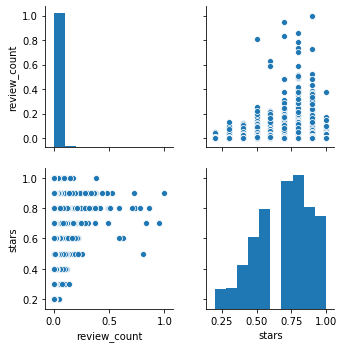

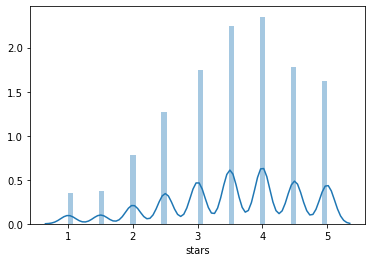

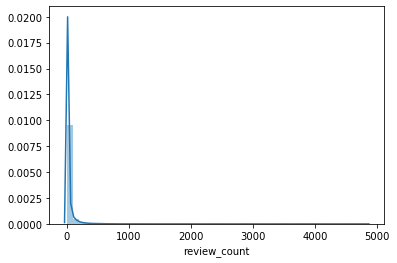

In [6]:
stars = dfBusiness.groupby('stars').mean()
stars.corr()

numeric_features = dfBusiness.loc[:, ['review_count', 'stars']]
numeric_features_standardized = (numeric_features)/numeric_features.max()
ax = sns.pairplot(numeric_features_standardized)
plt.show()

ax = sns.distplot(dfBusiness['stars'])
plt.show()
ax = sns.distplot(dfBusiness['review_count'])
plt.show()

In [7]:
#Some of the features I noticed was that the majority of businesses were getting 4 star reviews. Does the amount of reviews that a business gets affect it's overall score?

In [8]:
dfBusiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
business_id     50000 non-null object
name            50000 non-null object
city            50000 non-null object
state           50000 non-null object
stars           50000 non-null float64
categories      49862 non-null object
review_count    50000 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [9]:
dfBusiness.info()
dfReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
business_id     50000 non-null object
name            50000 non-null object
city            50000 non-null object
state           50000 non-null object
stars           50000 non-null float64
categories      49862 non-null object
review_count    50000 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
business_id    50000 non-null object
user_id        50000 non-null object
stars          50000 non-null float64
text           50000 non-null object
dtypes: float64(1), object(3)
memory usage: 976.6+ KB


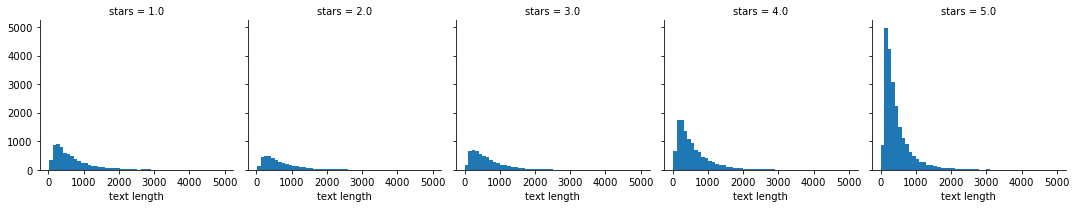

In [10]:
dfReview['text length'] = dfReview['text'].apply(len)
g = sns.FacetGrid(data=dfReview, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [11]:
#The above graphs tell us that the longer the review is, the more likely that the review is going to be 5 stars

In [12]:
#Need to do more pre processing on the dataframes
dfBusiness = dfBusiness.dropna()
dfBusiness['review_count']=dfBusiness['review_count'].fillna(0)
dfBusiness['stars']=dfBusiness['stars'].fillna(0)

In [13]:
dfRev_Bus = dfBusiness.merge(dfReview, on=('business_id'), suffixes=('_bus', '_user'))
dfRev_Bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49991 entries, 0 to 49990
Data columns (total 11 columns):
business_id     49991 non-null object
name            49991 non-null object
city            49991 non-null object
state           49991 non-null object
stars_bus       49991 non-null float64
categories      49991 non-null object
review_count    49991 non-null int64
user_id         49991 non-null object
stars_user      49991 non-null float64
text            49991 non-null object
text length     49991 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.2+ MB


In [14]:
#Now going to run multinomial to predict class based on text

In [15]:
#First we need to round the stars as the classifier doesn't handle floats very well
dfReview.stars = dfReview.stars.round()

#Determing the amount of each of the counts
dfRev_Bus["stars_bus"].value_counts()
dfRev_Bus["stars_user"].value_counts()

#Need to process the 
dfRev_Bus['review_count']=dfRev_Bus['review_count'].fillna(0)

dfRev_Bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49991 entries, 0 to 49990
Data columns (total 11 columns):
business_id     49991 non-null object
name            49991 non-null object
city            49991 non-null object
state           49991 non-null object
stars_bus       49991 non-null float64
categories      49991 non-null object
review_count    49991 non-null int64
user_id         49991 non-null object
stars_user      49991 non-null float64
text            49991 non-null object
text length     49991 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.2+ MB


In [16]:
#Making another dataframe for just the business id, the review counts, and the text



dfBusRevText = ['review_count','text length']
dfRev_Bus[dfBusRevText] = dfRev_Bus[dfBusRevText].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print (dfRev_Bus)

                  business_id                      name             city  \
0      f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman        Cornelius   
1      6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose  North Las Vegas   
2      51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC             Mesa   
3      51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC             Mesa   
4      51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC             Mesa   
...                       ...                       ...              ...   
49986  H1j34TgbrVZkxeww9xlJTw             Steve's Gyros        Cleveland   
49987  H1j34TgbrVZkxeww9xlJTw             Steve's Gyros        Cleveland   
49988  8R2Gm4lsS90JG9jIYHlfeg                   Mondays          Madison   
49989  8R2Gm4lsS90JG9jIYHlfeg                   Mondays          Madison   
49990  8R2Gm4lsS90JG9jIYHlfeg                   Mondays          Madison   

      state  stars_bus                                         categories  \
0        N

In [17]:
dfRev_Bus = dfRev_Bus.drop(columns="city")
dfRev_Bus = dfRev_Bus.drop(columns="state")
print (dfRev_Bus)

                  business_id                      name  stars_bus  \
0      f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman        3.5   
1      6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose        2.5   
2      51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC        4.5   
3      51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC        4.5   
4      51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC        4.5   
...                       ...                       ...        ...   
49986  H1j34TgbrVZkxeww9xlJTw             Steve's Gyros        4.5   
49987  H1j34TgbrVZkxeww9xlJTw             Steve's Gyros        4.5   
49988  8R2Gm4lsS90JG9jIYHlfeg                   Mondays        2.5   
49989  8R2Gm4lsS90JG9jIYHlfeg                   Mondays        2.5   
49990  8R2Gm4lsS90JG9jIYHlfeg                   Mondays        2.5   

                                              categories  review_count  \
0      Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...      0.007981   
1      Hard

In [18]:
#Starting to get a training data set
X = dfRev_Bus[['review_count', 'text length']]
y = dfRev_Bus[['stars_bus']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49991 entries, 0 to 49990
Data columns (total 2 columns):
review_count    49991 non-null float64
text length     49991 non-null float64
dtypes: float64(2)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49991 entries, 0 to 49990
Data columns (total 1 columns):
stars_bus    49991 non-null float64
dtypes: float64(1)
memory usage: 781.1 KB


In [19]:
print(X)

       review_count  text length
0          0.007981     0.173269
1          0.000000     0.016807
2          0.005562     0.026811
3          0.005562     0.107643
4          0.005562     0.059424
...             ...          ...
49986      0.037969     0.025210
49987      0.037969     0.223489
49988      0.007013     0.036815
49989      0.007013     0.017207
49990      0.007013     0.206283

[49991 rows x 2 columns]


In [20]:
print(y)

       stars_bus
0            3.5
1            2.5
2            4.5
3            4.5
4            4.5
...          ...
49986        4.5
49987        4.5
49988        2.5
49989        2.5
49990        2.5

[49991 rows x 1 columns]


In [21]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=1)

print (trainX)

       review_count  text length
12400      0.017170     0.220688
33930      0.064329     0.230292
45494      0.016687     0.033613
23704      0.007981     0.309524
41305      0.058041     0.071429
...             ...          ...
43723      0.011125     0.126651
32511      0.047158     0.232293
5192       0.022491     0.097839
12172      0.003628     0.227091
33003      0.004111     0.125450

[37493 rows x 2 columns]


In [22]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(trainX, trainY)
   
intercept = regression_model.intercept_[0]
print("Expected star rating for the business using linear regression {}".format(intercept))

regression_model.score(testX, testY)

from sklearn.metrics import mean_squared_error
starPredict = regression_model.predict(testX)
regression_model_mse = mean_squared_error(starPredict, testY)
regression_model_mse

import math
math.sqrt(regression_model_mse)

Expected star rating for the business using linear regression 3.7108185646613827


0.718466299206588

In [23]:
from nltk.corpus import wordnet
from collections import Counter
def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(4)
    return most_common_pos_list[0][0]

In [24]:
# function to perform text preprocessing on the review text
# This function was taken from https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb

def preprocessing(text):
    
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # remove punctuations
    tokens = [char for char in tokens if char not in string.punctuation]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(x, get_pos(x)) for x in tokens]
    #tokens = [lmtzr.lemmatize(word, pos='v') for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=preprocessing).fit(X)

In [26]:
val = dfRev_Bus['text'].values[0]

print(preprocessing(val))

drive half-hour get gun range get old happy see range open cornelius amenity would expect range modern shooter come recreational purpose find range suitable fully electronic system lane wide tight like many range also offer membership competitive range around area daily lane rat bit pricy consider location charge much however stray away touristic price weapon ammo many store sell 'll want visit price quote 200 several store could n't bite bullet come range range


In [27]:
X = dfRev_Bus['text']
y = dfRev_Bus['stars_user']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=preprocessing).fit(X)

In [29]:
len(bow_transformer.vocabulary_)

934

In [30]:
X = bow_transformer.transform(X)

In [31]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))



Shape of Sparse Matrix:  (49991, 934)
Amount of Non-Zero occurrences:  1313934
Density: 2.8140697017111904


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (34993, 934)
Number transactions y_train dataset:  (34993,)
Number transactions X_test dataset:  (14998, 934)
Number transactions y_test dataset:  (14998,)


In [33]:
# Let us now train our model using Multinomial Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
# Predict on the test set
preds = nb.predict(X_test)

In [35]:
# Performance evaluation by confusion matrix and classification report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print(metrics.accuracy_score(y_test, preds))

[[ 863   66   37   76 1057]
 [ 346   47   43   82  717]
 [ 314   59   74  165 1056]
 [ 402   71  115  334 2544]
 [ 603   73   72  262 5520]]


              precision    recall  f1-score   support

         1.0       0.34      0.41      0.37      2099
         2.0       0.15      0.04      0.06      1235
         3.0       0.22      0.04      0.07      1668
         4.0       0.36      0.10      0.15      3466
         5.0       0.51      0.85      0.63      6530

    accuracy                           0.46     14998
   macro avg       0.32      0.29      0.26     14998
weighted avg       0.39      0.46      0.38     14998

0.4559274569942659


In [36]:
#review_verdict_transformed = bow_transformer.transform([review_verdict])
#predicted_rating = nb.predict(review_verdict_transformed)[0]
#check_df = pd.DataFrame(columns=dfRev_Bus.columns)
#check_df.loc[0] = dfRev_Bus.iloc[10]
#check_df['Predicted'] = predicted_rating


review_verdict = dfRev_Bus['text'][10]
review_verdict_transformed = bow_transformer.transform([review_verdict])
predicted_rating = nb.predict(review_verdict_transformed)[0]
check_df = pd.DataFrame(columns=dfRev_Bus.columns)
check_df.loc[0] = dfRev_Bus.iloc[10]
check_df['Predicted'] = predicted_rating

print (check_df)

              business_id                  name  stars_bus  \
0  oiAlXZPIFm2nBCt0DHLu_Q  Green World Cleaners        3.5   

                                          categories  review_count  \
0  Dry Cleaning & Laundry, Local Services, Laundr...      0.018863   

                  user_id  stars_user  \
0  45R6BBybzwDuJaL08d1myQ         5.0   

                                                text  text length  Predicted  
0  I have been going to this dry cleaning since I...     0.108243        1.0  


In [37]:
review_verdict_transformed = bow_transformer.transform([review_verdict])
predicted_rating = nb.predict(review_verdict_transformed)[0]
check_df = pd.DataFrame(columns=dfRev_Bus.columns)
check_df.loc[0] = dfRev_Bus.iloc[441]
check_df['Predicted'] = predicted_rating


review_verdict = dfRev_Bus['text'][441]
review_verdict_transformed = bow_transformer.transform([review_verdict])
predicted_rating = nb.predict(review_verdict_transformed)[0]
check_df = pd.DataFrame(columns=dfRev_Bus.columns)
check_df.loc[0] = dfRev_Bus.iloc[441]
check_df['Predicted'] = predicted_rating

print (check_df)

              business_id          name  stars_bus  \
0  AtD6B83S4Mbmq0t7iDnUVA  Veggie House        4.5   

                                          categories  review_count  \
0  Restaurants, Specialty Food, Japanese, Sushi B...      0.275453   

                  user_id  stars_user  \
0  EjfvH4HFPOfRW1ETl69FEA         5.0   

                                                text  text length  Predicted  
0  Best vegan restaurant in Las Vegas! Come here ...     0.019008        5.0  


In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.2, dual=False)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = (preds==y_test).mean()
print(f'Accuracy: {acc}')

Accuracy: 0.4719962661688225


c:\users\ryanw\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

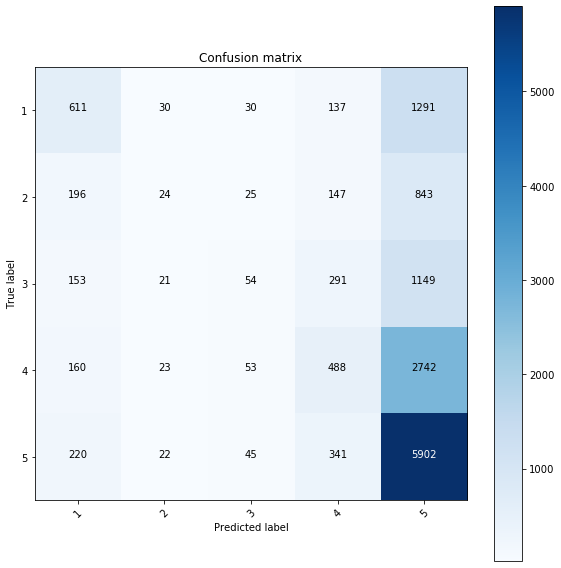

In [40]:
plot_confusion_matrix(confusion_matrix(y_test, preds.T), classes=['1', '2','3','4','5'], title='Confusion matrix')